In [ ]:
# import torch
# import torch.nn as nn
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# import sys
# import os
# %matplotlib inline

# ################################################################################
# # Some simple plotting utilities
# ################################################################################


# def plot_data(data: np.ndarray,
#               labels: np.ndarray,
#               ax: matplotlib.axes.Axes = None):
#     """
#     A helper function to plot our data sets

#     PARAMETERS
#     ----------
#     data      A numpy array of 2 columns (dimensions) and 2*examples_per_class rows

#     labels    A numpy vector with 2*examples_per_class, with a +1 or -1 in each
#               element. The jth element is the label of the jth example

#     ax        An optional matplotlib axis object to plot to
#     """

#     # require shape (n, 2)
#     assert data.ndim == 2
#     assert data.shape[-1] == 2

#     if type(data) == torch.Tensor:
#         data = data.numpy()

#     # plot the data
#     pos_idx = np.where(labels == 1)
#     neg_idx = np.where(labels == -1)

#     if ax is None:
#         ax = plt
#     ax.plot(
#         data.T[0, pos_idx],
#         data.T[1, pos_idx],
#         'r^',
#         label='positive'
#     )
#     ax.plot(
#         data.T[0, neg_idx],
#         data.T[1, neg_idx],
#         'bo',
#         label='negative'
#     )
#     ax.axis('equal')
#     handles, labels = plt.gca().get_legend_handles_labels()
#     by_label = dict(zip(labels, handles))
#     plt.legend(by_label.values(), by_label.keys(), loc="upper right")

#     if ax is None:
#         plt.show()


# def plot_decision_surface(model=None,
#                           axis_limits=(-5, 5, -5, 5),
#                           ax: matplotlib.axes.Axes = None):
#     """
#     Creates a grid of points, measures what a model would label each
#     point as, and uses this data to draw a region for each class.

#     PARAMETERS
#     ----------
#     model       A callable model that can take 3-d input (bias + x1, x2) and produce
#                 a class label for each data point.

#     axis_limits An array-like object with 4 floats [lowest_horizontal, highest_horizontal,
#                 lowest_vertical, highest_vertical]. This sets the limits over which
#                 the decision surface will be calculated and plotted.

#     ax          An optional matplotlib axis object to plot to

#     RETURNS
#     -------
#     my_contour  a matplotlib.contour.QuadContourSet with the contour
#     """

#     # Create a grid of points spanning the entire space displayed in the axis
#     xx, yy = np.meshgrid(np.arange(axis_limits[0], axis_limits[1], .05),
#                          np.arange(axis_limits[2], axis_limits[3], .05))
#     data = np.concatenate([xx.reshape([1, -1]), yy.reshape([1, -1])]).T

#     # Add a bias term of 1 to each point in the grid, resulting in shape [N, 3]
#     bias_column = np.ones((data.shape[0], 1))  # Create a column of ones for the bias term
#     data_with_bias = np.hstack([bias_column, data])  # Combine bias, x1, and x2 columns

#     # Predict the class of each point in the grid using the model
#     if isinstance(model, nn.Module):
#         with torch.no_grad():
#             pl = model(torch.tensor(data_with_bias).to(dtype=torch.float32))
#             predicted_labels = torch.argmax(pl, dim=1).numpy()  # Get class predictions
#     else:
#         predicted_labels = model(data_with_bias)

#     # Reshape the predictions to match the grid shape for plotting
#     predicted_labels = predicted_labels.reshape(xx.shape)

#     # Put the result into a color plot
#     if ax is None:
#         ax = plt

#     ax.contourf(xx, yy, predicted_labels, cmap=plt.cm.Paired)
#     ax.axis('equal')
#     ax.axis('tight')

#     if ax is None:
#         plt.show()
# def plot_decision_regions(
#         features, targets, model,
#         axis=None, transform=None,
#         bounds=None,
#         title='Decision Surface'):
#     """
#     Slightly different plotting approach than above. Used in backprop demo.

#     This function produces a single plot containing a scatter plot of the
#     features, targets, and decision region of the model.

#     Args:
#         features (np.ndarray): 2D array containing real-valued inputs.
#         targets (np.ndarray): 1D array containing binary targets.
#         model: a learner with .predict() method
#         axis: the axis on which to plot. If None, create a new plot
#         title: title of the plot
#     Returns:
#         None (plots to the active figure)
#     """

#     # define bounds of the domain
#     if bounds is None:
#         min1, max1, min2, max2 = compute_bounds(features)
#     else:
#         min1, max1, min2, max2 = bounds

#     # define grid for visualizing decision regions
#     x1grid = np.arange(min1, max1, 0.1)
#     x2grid = np.arange(min2, max2, 0.1)

#     xx, yy = np.meshgrid(x1grid, x2grid)

#     # flatten grid to a vector
#     r1, r2 = xx.flatten(), yy.flatten()
#     r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

#     # horizontally stack vectors to create x1,x2 input for the model
#     grid = np.hstack((r1,r2))

#     # if we're transforming the features, do that now
#     #     this allows xx and yy to still be in 2D for the visualization
#     #     but grid has been transformed so it matches up with the fit model
#     if transform is not None:
#         grid = transform(grid)

#     # generate predictions over grid
#     yhat = model.predict(grid)

#     # reshape the predictions back into a grid
#     zz = yhat.reshape(xx.shape)


#     if axis is None:
#         fig, axis = plt.subplots()

#     # plot the grid of x, y and z values as a surface
#     binary_cmap = matplotlib.colors.ListedColormap(['#9ce8ff', '#ffc773'])
#     axis.contourf(xx, yy, zz, cmap=binary_cmap, alpha=0.7)

#     # plot "negative" class:
#     row_idx_neg = np.where(targets < 0.5)[0]
#     axis.scatter(
#         features[row_idx_neg, 0], features[row_idx_neg, 1],
#         label='negative')

#     # plot "positive" class:
#     row_idx_pos = np.where(targets > 0.5)[0]
#     axis.scatter(
#         features[row_idx_pos, 0], features[row_idx_pos, 1],
#         label='positive')

#     axis.set_title(title)
#     axis.set_xlim(min1, max1)
#     axis.set_ylim(min2, max2)

#     axis.legend(loc="upper left")

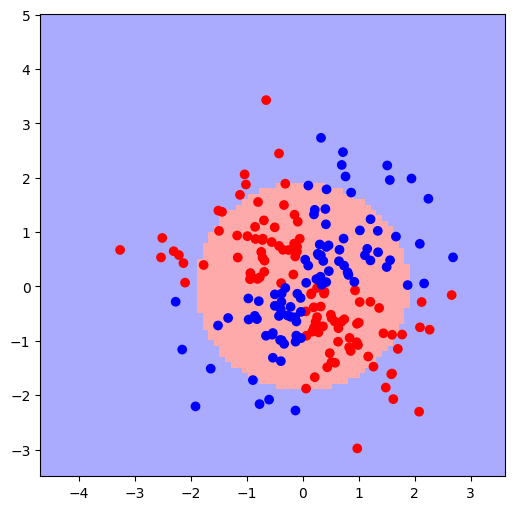

In [ ]:
# import torch
# import torch.nn as nn

# import matplotlib
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# import numpy as np
# import sys
# import os
# import random

# %matplotlib inline

# np.random.seed(42)
# torch.manual_seed(0)

# def read_data(name,mode):

#     x_data = []
#     y_data = []
#     label_data = []

#     base_dir = os.getcwd()
#     root = base_dir
#     filename = '%s/%s_%s.csv' % (root,name,mode)

#     i = 0
#     with open(filename,'rt') as f:
#         for line in f:
#             line = line.replace('\n','')
#             tokens = line.split(',')
#             if i > 0:
#                 y = int(float(tokens[0]))
#                 x1 = float(tokens[1])
#                 x2 = float(tokens[2])
#                 x_data.append([1.0,x1,x2])
#                 y_data.append([y])
#                 temp = [0,0]
#                 temp[y] = 1
#                 label_data.append(temp)
#             i = i + 1
#     xs = np.array(x_data,dtype='float32')
#     ys = np.array(y_data,dtype='float32')
#     labels = np.array(label_data,dtype='float32')
#     return(xs,ys,labels)

# class net3(nn.Module):
#     def __init__(self,input_size,nodes,output_size):
#         super(net3,self).__init__()
# #        self.l1 = nn.Linear(input_size,nodes)
# #        self.activation = nn.Tanh()

#     def forward(self,x):
# #        output = self.l1(x)
# #        output = self.activation(output)
#         a = torch.mul(x[:,1],x[:,1])
#         b = torch.mul(x[:,2],x[:,2])
#         c = (a+b)/9.0
#         output = torch.exp(c)
#         return output

# def draw_example(nodes,name,model):
#     x_train, y_train, label_train = read_data(name,'train')
#     x_test, y_test, label_test = read_data(name,'test')

#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6*(1+0)))

#     h = .1  # step size in the mesh
#     cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
#     cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#     x_min, x_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
#     y_min, y_max = x_train[:, 2].min() - 1, x_train[:, 2].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
#     Z = np.zeros([xx.shape[0],yy.shape[1]],dtype='float32')
#     Z2 = np.zeros([nodes,xx.shape[0],yy.shape[1]],dtype='float32')
#     grid_data = np.ones([1,3],dtype='float32')

#     grid_data2 = np.zeros([1,3],dtype='float32')
#     for i in range(xx.shape[0]):
#         for j in range(yy.shape[1]):
#             x = xx[i,j]
#             y = yy[i,j]
#             grid_data2[0,0] = 1.0
#             grid_data2[0,1] = x
#             grid_data2[0,2] = y

#             x = torch.from_numpy(grid_data2)
#             pred = model(x)
#             if (pred[0].item()-6.0) > -4.5:
#                 yh = 1.0
#             else:
#                 yh = 0.0
#             Z[i,j] = yh
#     ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
#     ax.scatter(x_test[:, 1], x_test[:, 2], c=y_test[:,0], cmap=cmap_bold)

# nodes = 3
# name = 'xor'
# model = net3(3,nodes,1)
# draw_example(nodes,name,model=model)



## Pytorch Implementation with MCE

**Design choice**: We choose epoch 100, with a batch size of 16 (Pytorch default), and learning rate be 0.01. Since there are only several hundreds data in the training dataset, 16 * 100 = 1600 number of samplings from the training set with replacement would be adequate enough while also maintaining manageable performance.

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [33]:
## function for plot learning curves

def plot_learning_curves(train_loss, val_loss, title="Learning Curves"):
    """
    Plot the learning curves for training and validation loss.

    Parameters:
    - train_loss: List of training loss values over epochs.
    - val_loss: List of validation loss values over epochs.
    - title: Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(train_loss, label="Training Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_best_decision_surface(model, x_test, y_test, title="Decision Surface", axis_limits = (-5,5,-5,5)):
    """
    Plot the decision surface of the best model using test data.

    Parameters:
    - model: Trained model to generate predictions.
    - x_test: Test dataset features (2D array).
    - y_test: Test dataset labels.
    - title: Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    plot_decision_surface(model=model, axis_limits = axis_limits)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

 Pytorch Implementation with MCE: 
hyperparameters: 
 epochs: 100 
 learning_rate: 0.01 
 batch size: 16


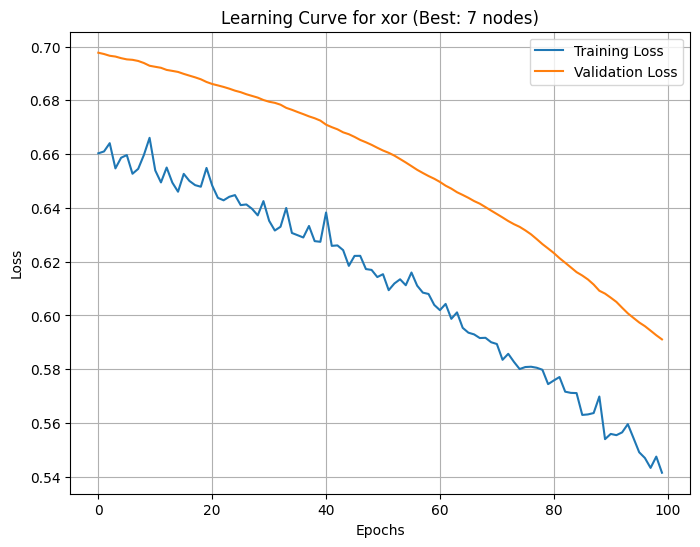

final text accuracy for xor: 0.665


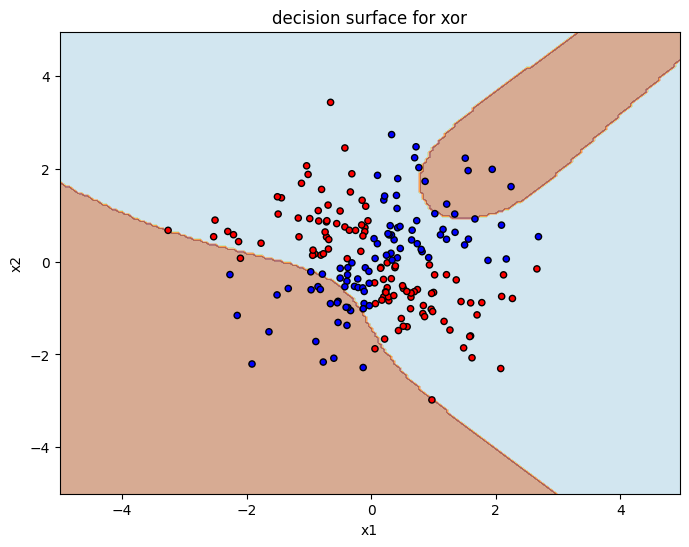

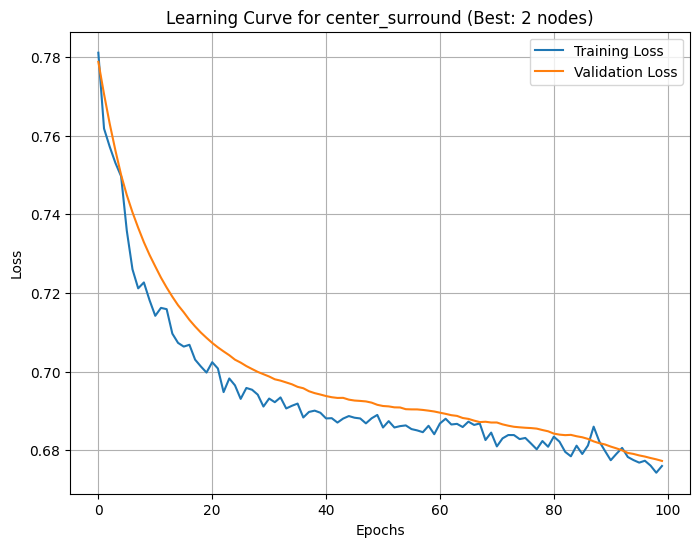

final text accuracy for center_surround: 0.63


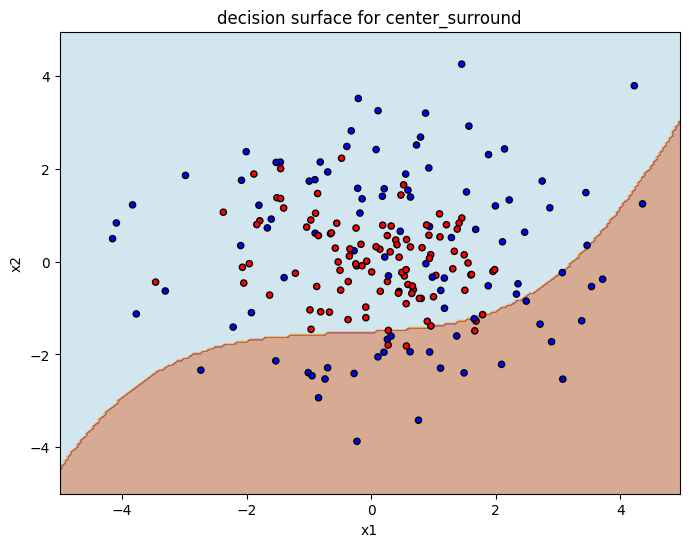

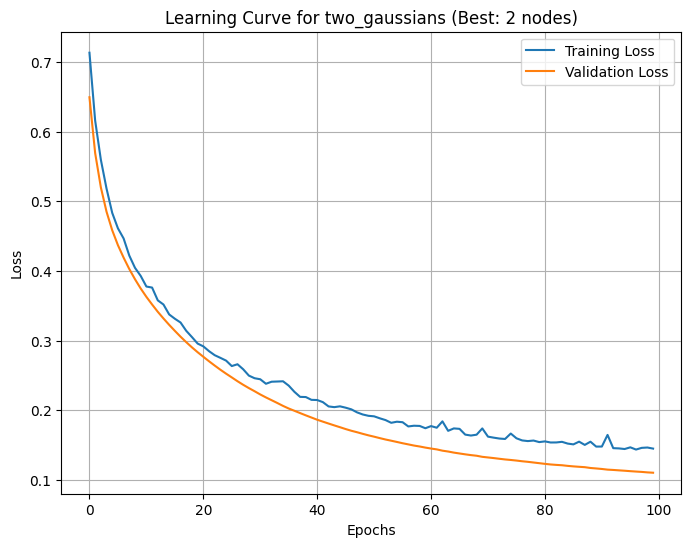

final text accuracy for two_gaussians: 0.915


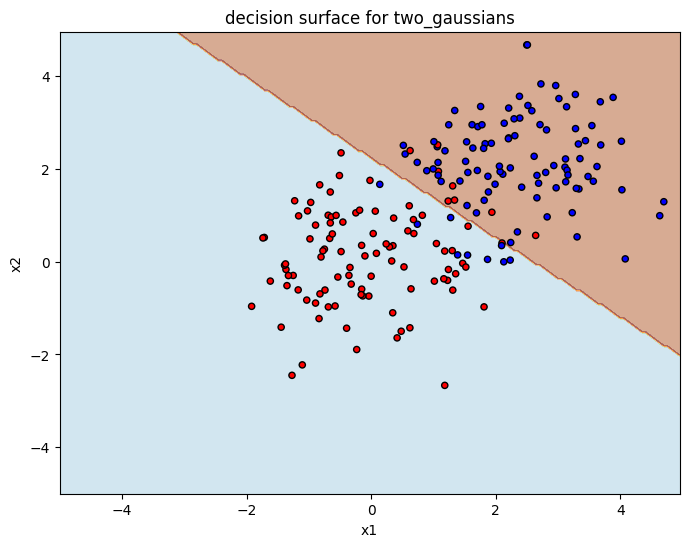

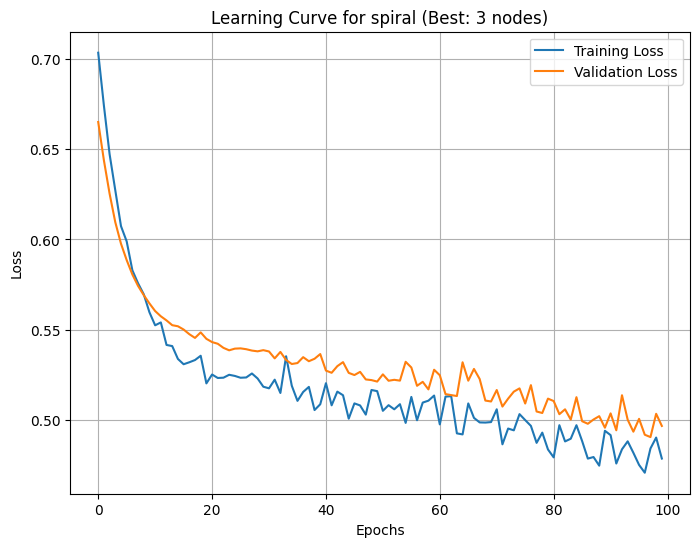

final text accuracy for spiral: 0.805


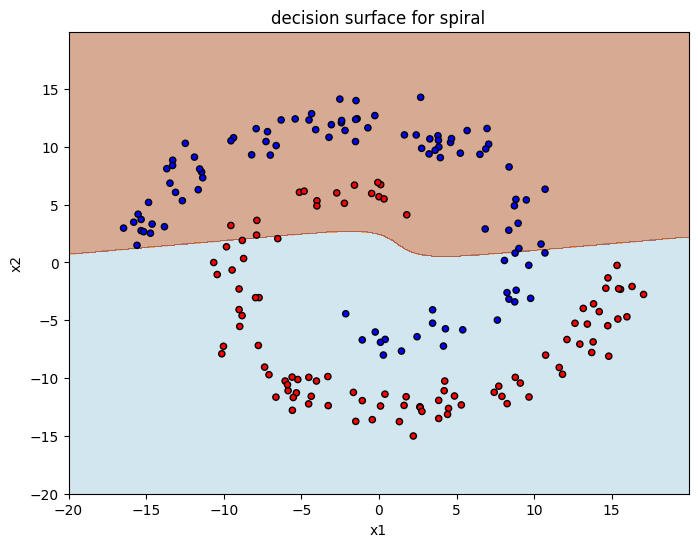

In [ ]:
# FFNN Class Definition
class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, activation):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim, bias=False)
        self.fc2 = nn.Linear(hidden_dim, output_dim, bias=False)
        #use Sigmoid as activation function
        self.activation_fn = activation
    
    def forward(self, x):
        #apply activation function after doing linear combination between input layer and hidden layer.
        x = self.activation_fn(self.fc1(x))
        # since we are using Cross entropy loss as the loss function， we dont need activation function for output layer
        x = self.fc2(x)
        return x

# Training and Evaluation Helper Functions

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs):
    """
    params:
        model: A model instance (FFNN in our case)
        train_loader: A DataLoader type for training data for each iteration
        val_loader: A DataLoader type for validation data, which is used for each iteration.
        criterion: The loss function used (e.g: Muti-class Cross Entropy loss function)
        optimizer: 
        epochs: the number of training and validation iteration.
    """
    train_loss, val_loss = [], []
    for epoch in range(epochs):
        model.train() # set model to train mode
        epoch_loss = 0
        for x_batch, y_batch in train_loader:
            #clear the gradient stored in the optimizer.
            y_batch = y_batch.squeeze().long()
            optimizer.zero_grad()
            output = model(x_batch)
            loss = criterion(output, y_batch)
            #use gradient descent to train mode by using backward(), calculating the gradient, and step(), do the gradient descent process.
            loss.backward()
            optimizer.step()
            #calculate the average loss of this epoch and store it in train_loss list
            epoch_loss += loss.item()
        train_loss.append(epoch_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_epoch_loss = 0
        for x_val, y_val in val_loader:
            y_val = y_val.squeeze().long()
            val_output = model(x_val)
            val_loss_batch = criterion(val_output, y_val)
            val_epoch_loss += val_loss_batch.item()
        val_loss.append(val_epoch_loss / len(val_loader))
    return train_loss, val_loss

def evaluate_model(model, data_loader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for x_batch, y_batch in data_loader:
            y_batch = y_batch.squeeze().long()
            output = model(x_batch)
            predictions = torch.argmax(output, dim=1)
            correct += (predictions == y_batch).sum().item()
            total += y_batch.size(0)
    return correct / total
def load_data(name):
        x_train, y_train, _ = read_data(name, 'train')
        x_test, y_test, _ = read_data(name, 'test')
        x_val, y_val, _ = read_data(name, 'valid')
        
        x_train, y_train = torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)
        x_val, y_val = torch.tensor(x_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long)
        x_test, y_test = torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long)
        
        # Loaders for batching
        train_loader = torch.utils.data.DataLoader(dataset=torch.utils.data.TensorDataset(x_train, y_train), batch_size=16, shuffle=True)
        val_loader = torch.utils.data.DataLoader(dataset=torch.utils.data.TensorDataset(x_val, y_val), batch_size=16, shuffle=False)
        test_loader = torch.utils.data.DataLoader(dataset=torch.utils.data.TensorDataset(x_test, y_test), batch_size=16, shuffle=False)
        
        return train_loader, val_loader, test_loader
    

# Hyperparameters and configurations
print(" Pytorch Implementation with MCE: ")
nodes_options = [2, 3, 5, 7, 9]
epochs = 100
learning_rate = 0.01
dataset_names = ["xor", "center_surround", "two_gaussians", "spiral"]
print(f"hyperparameters: \n epochs: {epochs} \n learning_rate: {learning_rate} \n batch size: 16")
for name in dataset_names:
    train_loader, val_loader, test_loader = load_data(name)
    best_accuracy = 0
    best_model = None
    best_k = 0
    best_train_loss, best_val_loss = None, None
    for node in nodes_options:
        # two weights and 1 bias
        ffnn = FFNN(3, node, 2, nn.Tanh())
        criterion = nn.CrossEntropyLoss()
        # use Stochastic Gradient Descent as my optimizer
        optimizer = optim.SGD(ffnn.parameters(), lr = learning_rate)
        # get the list of train loss, validation loss for each epoch
        train_loss, val_loss = train_model(ffnn, train_loader, val_loader, criterion, optimizer, epochs)
        # get accuracy of model
        accuracy = evaluate_model(ffnn, test_loader)
        #find best accuracy and other variables
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = ffnn
            best_k = node
            best_train_loss, best_val_loss = train_loss, val_loss
    
    plot_learning_curves(best_train_loss, best_val_loss, f"Learning Curve for {name} (Best: {best_k} nodes)")
    print(f"final text accuracy for {name}: {best_accuracy}")
    x_test, y_test, _ = read_data(name, 'test')
    y_test = y_test.squeeze()
    x_test = x_test = x_test[:, 1:]
    if name == "spiral":
        plot_best_decision_surface(best_model,x_test, y_test, title = f"decision surface for {name}", axis_limits=(-20, 20, -20, 20))
    else:
        plot_best_decision_surface(best_model,x_test, y_test, title = f"decision surface for {name}")

## Pytorch Implementation with MSE

**Design choice:** Again we choose the same parameters, this way I can setup a controlled environment test the difference in result between two lost function.

 Pytorch Implementation with MSE: 
hyperparameters: 
 epochs: 100 
 learning_rate: 0.01 
 batch size: 16


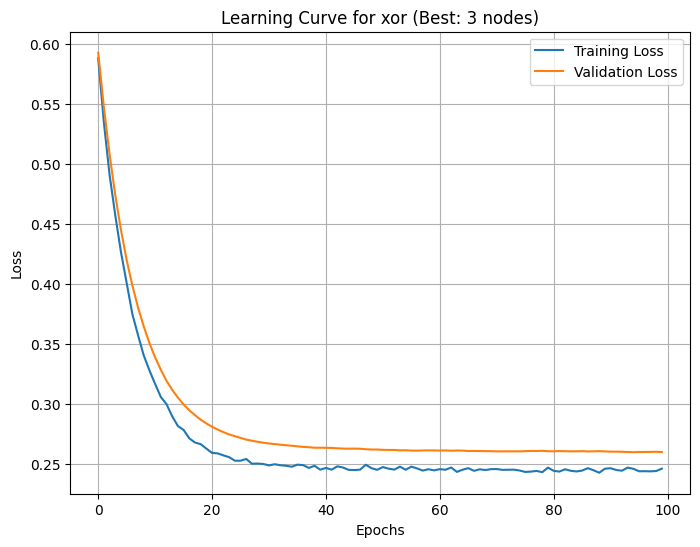

final text accuracy for xor: 0.55


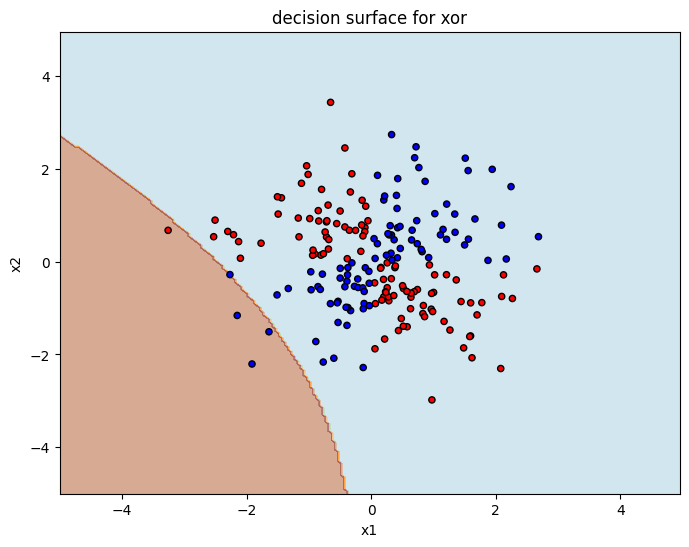

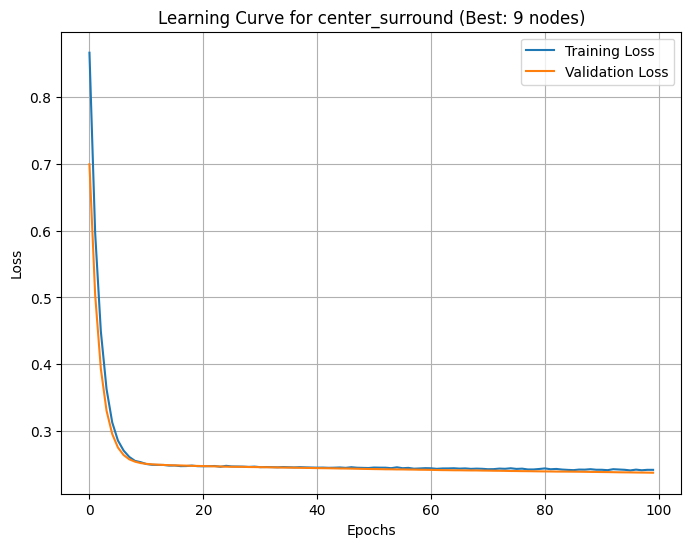

final text accuracy for center_surround: 0.585


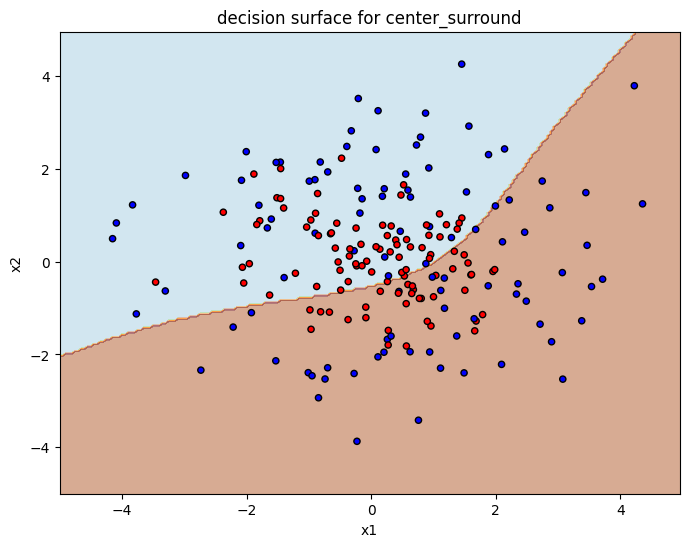

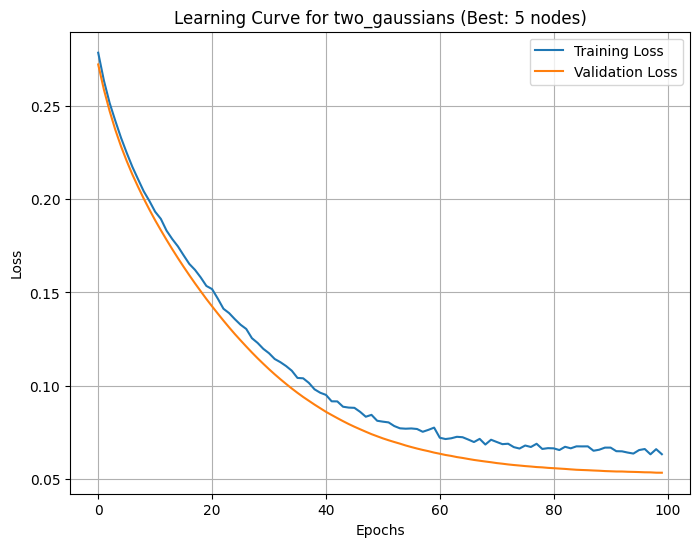

final text accuracy for two_gaussians: 0.93


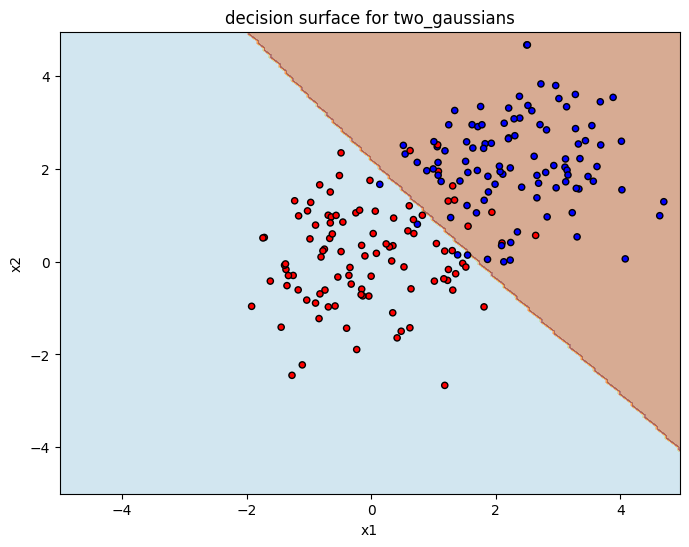

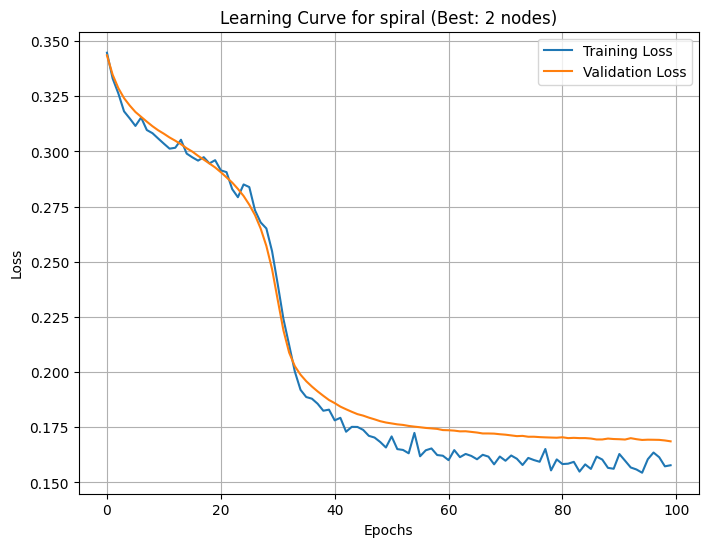

final text accuracy for spiral: 0.8


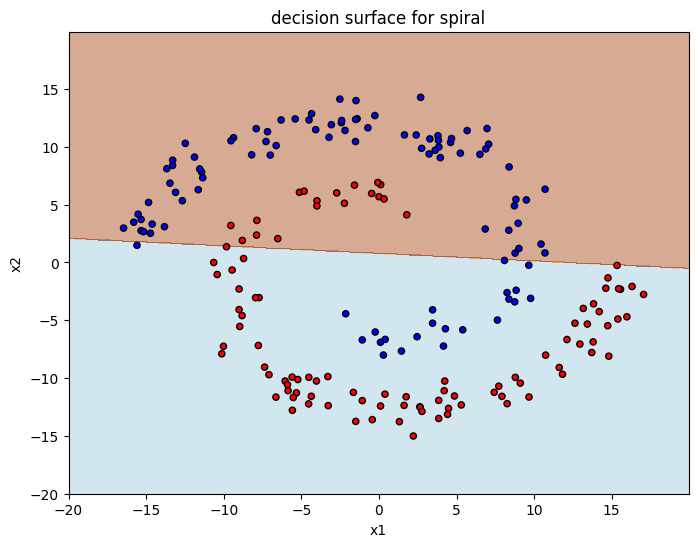

In [37]:
import torch.nn.functional as F
print(" Pytorch Implementation with MSE: ")
def train_model_MSE(model, train_loader, val_loader, criterion, optimizer, epochs):
    train_loss, val_loss = [], []
    for epoch in range(epochs):
        model.train()  # set model to train mode
        epoch_loss = 0
        for x_batch, y_batch in train_loader:
            # Convert y_batch to one-hot encoding for MSE
            y_batch = F.one_hot(y_batch.squeeze().long(), num_classes=2).float()
            
            optimizer.zero_grad()
            output = model(x_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        train_loss.append(epoch_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_epoch_loss = 0
        with torch.no_grad():
            for x_val, y_val in val_loader:
                y_val = F.one_hot(y_val.squeeze().long(), num_classes=2).float()
                val_output = model(x_val)
                val_loss_batch = criterion(val_output, y_val)
                val_epoch_loss += val_loss_batch.item()
        val_loss.append(val_epoch_loss / len(val_loader))
    return train_loss, val_loss

def evaluate_model_MSE(model, data_loader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for x_batch, y_batch in data_loader:
            output = model(x_batch)
            predictions = torch.argmax(output, dim=1)
            correct += (predictions == y_batch.squeeze()).sum().item()
            total += y_batch.size(0)
    return correct / total

nodes_options = [2, 3, 5, 7, 9]
epochs = 100
learning_rate = 0.01
dataset_names = ["xor", "center_surround", "two_gaussians", "spiral"]
print(f"hyperparameters: \n epochs: {epochs} \n learning_rate: {learning_rate} \n batch size: 16")
for name in dataset_names:
    train_loader, val_loader, test_loader = load_data(name)
    best_accuracy = 0
    best_model = None
    best_k = 0
    best_train_loss, best_val_loss = None, None
    for node in nodes_options:
        # two weights and 1 bias, and use Sigmoid() to train
        ffnn = FFNN(3, node, 2, nn.Sigmoid())
        criterion = nn.MSELoss()
        # use Stochastic Gradient Descent as my optimizer
        optimizer = optim.SGD(ffnn.parameters(), lr = learning_rate)
        # get the list of train loss, validation loss for each epoch
        train_loss, val_loss = train_model_MSE(ffnn, train_loader, val_loader, criterion, optimizer, epochs)
        # get accuracy of model
        accuracy = evaluate_model_MSE(ffnn, test_loader)
        #find best accuracy and other variables
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = ffnn
            best_k = node
            best_train_loss, best_val_loss = train_loss, val_loss
    
    plot_learning_curves(best_train_loss, best_val_loss, f"Learning Curve for {name} (Best: {best_k} nodes)")
    print(f"final text accuracy for {name}: {best_accuracy}")
    x_test, y_test, _ = read_data(name, 'test')
    y_test = y_test.squeeze()
    x_test = x_test = x_test[:, 1:]
    if name == "spiral":
        plot_best_decision_surface(best_model,x_test, y_test, title = f"decision surface for {name}", axis_limits=(-20, 20, -20, 20))
    else:
        plot_best_decision_surface(best_model,x_test, y_test, title = f"decision surface for {name}")

## manual gradient and update

**Design choice:** We decided to implement FFNN with MCE as cost function manually. Including things like explicit forward propagation and manual gradient calculation. We also implement the cross entropy loss to ensure smooth gradient update. 

Same as before, we use Epoch 100 with batch size 16 and learning rate of 0.1. We want to maintain consistency and make the comparison between different implementation easier.

Manual Implementation with Cross-Entropy Loss:

Training on xor dataset:
  Training with 2 hidden nodes...
    Accuracy: 0.6700
  Training with 3 hidden nodes...
    Accuracy: 0.8100
  Training with 5 hidden nodes...
    Accuracy: 0.9350
  Training with 7 hidden nodes...
    Accuracy: 0.8500
  Training with 9 hidden nodes...
    Accuracy: 0.8650


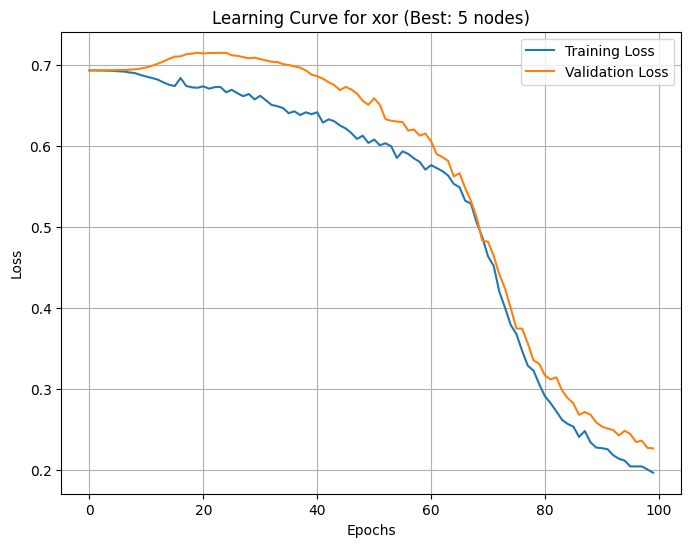

Final test accuracy for xor: 0.935


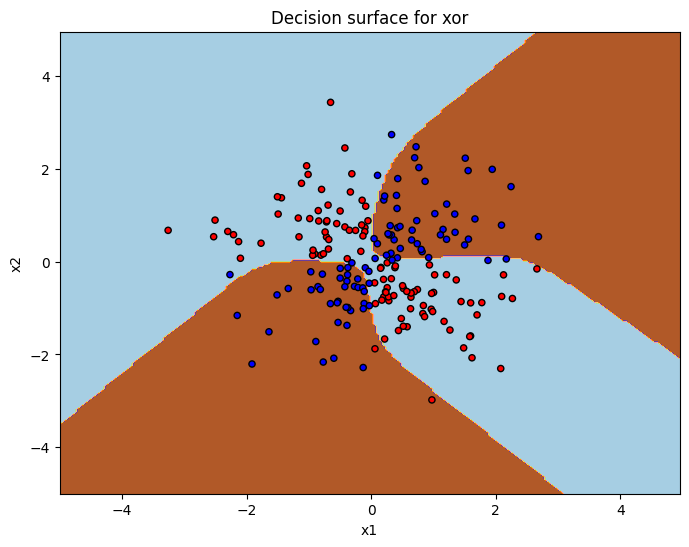


Training on center_surround dataset:
  Training with 2 hidden nodes...
    Accuracy: 0.6150
  Training with 3 hidden nodes...
    Accuracy: 0.6900
  Training with 5 hidden nodes...
    Accuracy: 0.7650
  Training with 7 hidden nodes...
    Accuracy: 0.7200
  Training with 9 hidden nodes...
    Accuracy: 0.7550


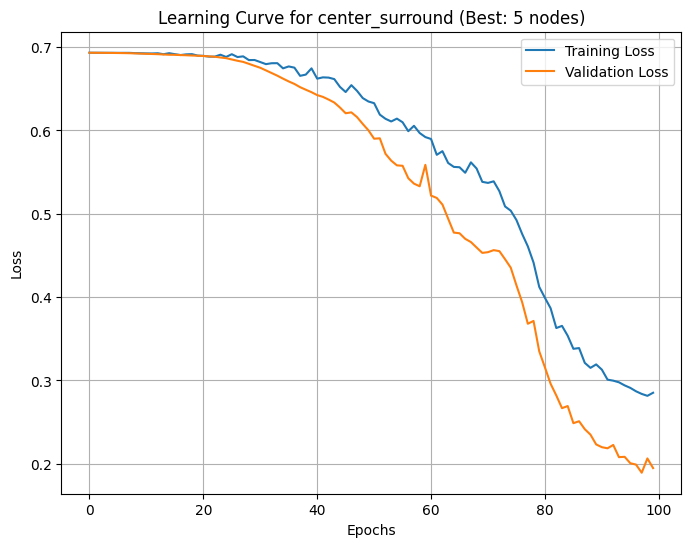

Final test accuracy for center_surround: 0.765


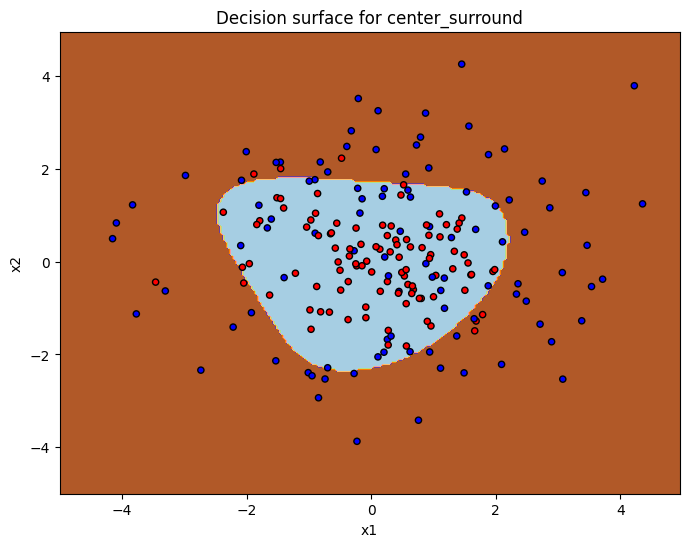


Training on two_gaussians dataset:
  Training with 2 hidden nodes...
    Accuracy: 0.9150
  Training with 3 hidden nodes...
    Accuracy: 0.9100
  Training with 5 hidden nodes...
    Accuracy: 0.9150
  Training with 7 hidden nodes...
    Accuracy: 0.9150
  Training with 9 hidden nodes...
    Accuracy: 0.9100


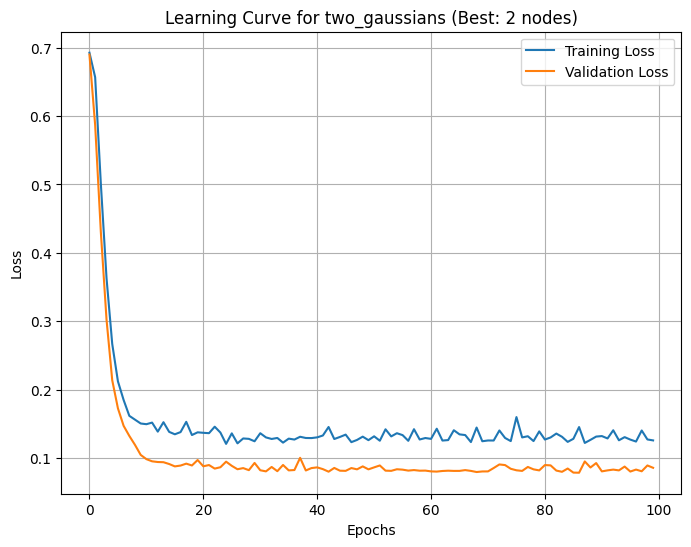

Final test accuracy for two_gaussians: 0.915


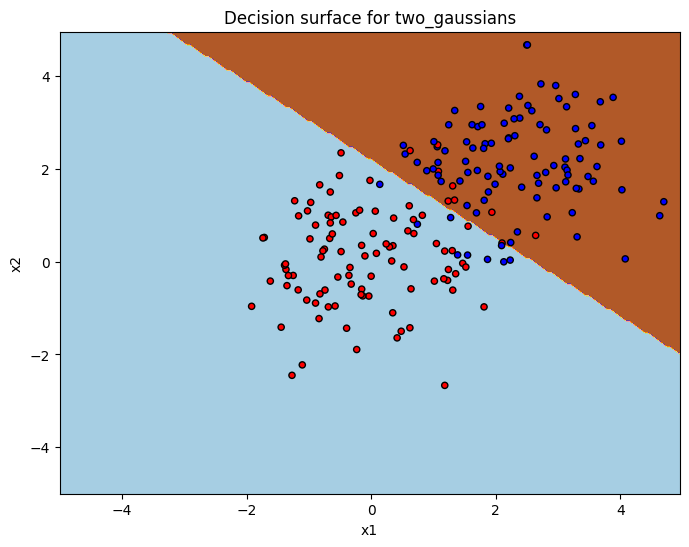


Training on spiral dataset:
  Training with 2 hidden nodes...
    Accuracy: 0.7850
  Training with 3 hidden nodes...
    Accuracy: 0.7300
  Training with 5 hidden nodes...
    Accuracy: 0.7500
  Training with 7 hidden nodes...
    Accuracy: 0.7450
  Training with 9 hidden nodes...
    Accuracy: 0.7350


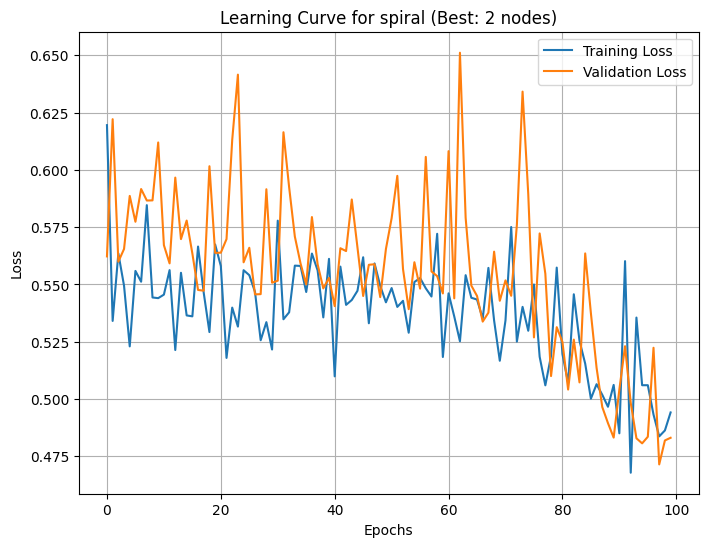

Final test accuracy for spiral: 0.785


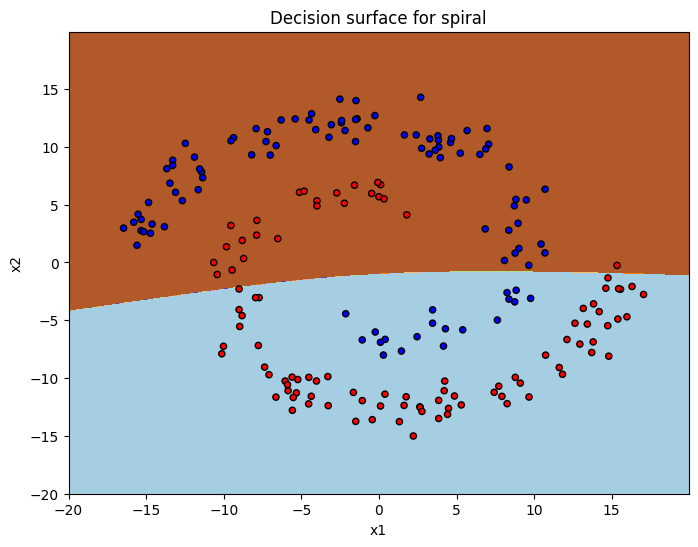

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class ManualFFNN:
    def __init__(self, input_dim, hidden_dim, output_dim):
        # Initialize weights with random values
        self.W1 = np.random.randn(input_dim, hidden_dim) * 0.01
        self.W2 = np.random.randn(hidden_dim, output_dim) * 0.01
        
        # Store dimensions
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        
        # Store intermediate values for backpropagation
        self.x = None
        self.z1 = None
        self.a1 = None
        self.z2 = None
        self.a2 = None

    def tanh(self, x):
        return np.tanh(x)
    
    def tanh_derivative(self, x):
        return 1.0 - np.tanh(x)**2
    
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        # exp_x = np.exp(x)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def forward(self, x):
        # Store input
        self.x = x
        
        # First layer
        self.z1 = np.dot(x, self.W1)
        self.a1 = self.tanh(self.z1)
        
        # Second layer
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.softmax(self.z2)
        
        return self.a2
    
    def backward(self, y):
        batch_size = self.x.shape[0]
        
        # Convert y to one-hot encoding if it's not already
        if len(y.shape) == 1:
            y_one_hot = np.zeros((batch_size, self.output_dim))
            y_one_hot[np.arange(batch_size), y.astype(int)] = 1
        else:
            y_one_hot = y
        
        # Gradient calculations
        dz2 = self.a2 - y_one_hot
        dW2 = np.dot(self.a1.T, dz2)
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.tanh_derivative(self.z1)
        dW1 = np.dot(self.x.T, dz1)
        
        return dW1, dW2
    
    def cross_entropy_loss(self, y_pred, y_true):
        batch_size = y_pred.shape[0]
        if len(y_true.shape) == 1:
            y_true = y_true.astype(int)
            y_true_one_hot = np.zeros((batch_size, self.output_dim))
            y_true_one_hot[np.arange(batch_size), y_true] = 1
        else:
            y_true_one_hot = y_true
            
        return -np.sum(y_true_one_hot * np.log(y_pred + 1e-8)) / batch_size


def plot_decision_surface_manual(model=None,
                                 axis_limits=(-5, 5, -5, 5),
                                 ax: matplotlib.axes.Axes = None):
    # Create a grid of points
    xx, yy = np.meshgrid(np.arange(axis_limits[0], axis_limits[1], .05),
                         np.arange(axis_limits[2], axis_limits[3], .05))
    data = np.concatenate([xx.reshape([1, -1]), yy.reshape([1, -1])]).T

    # Add bias column
    bias_column = np.ones((data.shape[0], 1))
    data_with_bias = np.hstack([bias_column, data])
    # print(f"data_with_bias shape: {data_with_bias.shape}")  # Debugging

    # Predict the class of each point
    predicted_labels = model.forward(data_with_bias)
    # print(f"Forward output shape: {predicted_labels.shape}")  # Debugging

    # Take argmax to get class indices
    predicted_labels = np.argmax(predicted_labels, axis=1)
    # print(f"Predicted labels shape after argmax: {predicted_labels.shape}")  # Debugging

    # Reshape to match the grid shape
    assert predicted_labels.size == xx.size, (
        f"Mismatch: predicted_labels size ({predicted_labels.size}) does not match grid size ({xx.size})."
    )
    predicted_labels = predicted_labels.reshape(xx.shape)

    # Plot the result
    if ax is None:
        ax = plt
    ax.contourf(xx, yy, predicted_labels, cmap=plt.cm.Paired)
    ax.axis('equal')
    ax.axis('tight')
    if ax is None:
        plt.show()

def plot_best_decision_surface_manual(model, x_test, y_test, title="Decision Surface", axis_limits = (-5,5,-5,5)):
    """
    Plot the decision surface of the best model using test data.

    Parameters:
    - model: Trained model to generate predictions.
    - x_test: Test dataset features (2D array).
    - y_test: Test dataset labels.
    - title: Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    plot_decision_surface_manual(model=model, axis_limits = axis_limits)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

def train_manual_model(model, x_train, y_train, x_val, y_val, learning_rate, epochs, batch_size):
    train_loss = []
    val_loss = []
    n_samples = x_train.shape[0]
    n_batches = (n_samples + batch_size - 1) // batch_size
    
    for epoch in range(epochs):
        epoch_loss = 0
        indices = np.random.permutation(n_samples)
        x_train = x_train[indices]
        y_train = y_train[indices]
        
        for i in range(n_batches):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, n_samples)
            
            x_batch = x_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]
            
            y_pred = model.forward(x_batch)
            batch_loss = model.cross_entropy_loss(y_pred, y_batch)
            epoch_loss += batch_loss
            
            dW1, dW2 = model.backward(y_batch)
            
            model.W1 -= learning_rate * dW1
            model.W2 -= learning_rate * dW2
        
        val_pred = model.forward(x_val)
        val_epoch_loss = model.cross_entropy_loss(val_pred, y_val)
        
        train_loss.append(epoch_loss / n_batches)
        val_loss.append(val_epoch_loss)
    
    return train_loss, val_loss

def evaluate_manual_model(model, x_test, y_test):
    predictions = model.forward(x_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = y_test.astype(int)
    return np.mean(predicted_classes == true_classes)

def load_manual_data(name):
    x_train, y_train, _ = read_data(name, 'train')
    x_test, y_test, _ = read_data(name, 'test')
    x_val, y_val, _ = read_data(name, 'valid')
    
    x_train = np.array(x_train, dtype=np.float32)
    y_train = np.array(y_train, dtype=np.float32).reshape(-1)
    x_val = np.array(x_val, dtype=np.float32)
    y_val = np.array(y_val, dtype=np.float32).reshape(-1)
    x_test = np.array(x_test, dtype=np.float32)
    y_test = np.array(y_test, dtype=np.float32).reshape(-1)
    
    return (x_train, y_train), (x_val, y_val), (x_test, y_test)

# Main training loop
print("Manual Implementation with Cross-Entropy Loss:")
nodes_options = [2, 3, 5, 7, 9]
epochs = 100
learning_rate = 0.01
batch_size = 16
dataset_names = ["xor", "center_surround", "two_gaussians", "spiral"]

for name in dataset_names:
    print(f"\nTraining on {name} dataset:")
    (x_train, y_train), (x_val, y_val), (x_test, y_test) = load_manual_data(name)
    best_accuracy = 0
    best_model = None
    best_k = 0
    best_train_loss, best_val_loss = None, None
    
    for node in nodes_options:
        print(f"  Training with {node} hidden nodes...")
        model = ManualFFNN(input_dim=3, hidden_dim=node, output_dim=2)
        train_loss, val_loss = train_manual_model(
            model, x_train, y_train, 
            x_val, y_val, 
            learning_rate, epochs, batch_size
        )
        accuracy = evaluate_manual_model(model, x_test, y_test)
        print(f"    Accuracy: {accuracy:.4f}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_k = node
            best_train_loss, best_val_loss = train_loss, val_loss
    
    plot_learning_curves(best_train_loss, best_val_loss, 
                        f"Learning Curve for {name} (Best: {best_k} nodes)")
    print(f"Final test accuracy for {name}: {best_accuracy}")
    
    x_test_plot = x_test[:, 1:]  # Remove bias term for plotting
    if name == "spiral":
        plot_best_decision_surface_manual(best_model, x_test_plot, y_test, 
                                 title=f"Decision surface for {name}", 
                                 axis_limits=(-20, 20, -20, 20))
    else:
        plot_best_decision_surface_manual(best_model, x_test_plot, y_test, 
                                 title=f"Decision surface for {name}")

## Adding Regularizers

**Design choice**: Using what we had in step 2 with the same parameters, we added two Regularizers, Frobenius Norm Regularizer and Orthogonality Regularizer. We use `lambda_norm` and `lambda_orth` to control the impact of the regularizer on the training of the model. 

With the regularizer in place we can see a significant increase in the testing accuracy of xor. Overall several run we see an increase from around 55% accuracy without regularizer to around 80% with regularizer. 

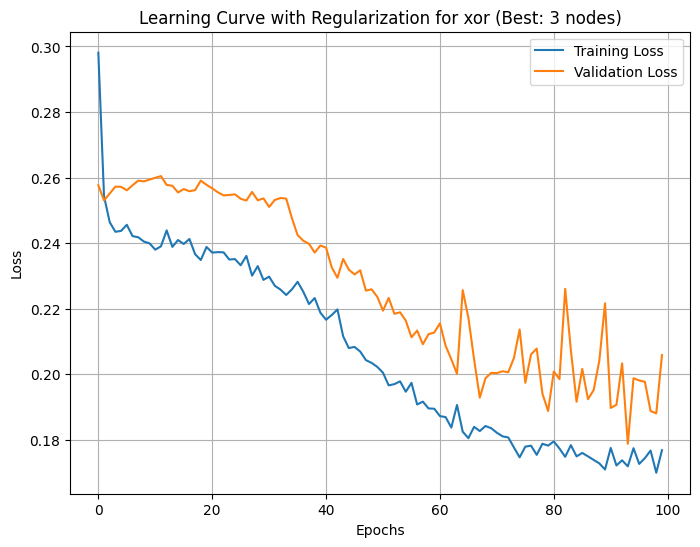

Final test accuracy for xor with regularization: 0.73


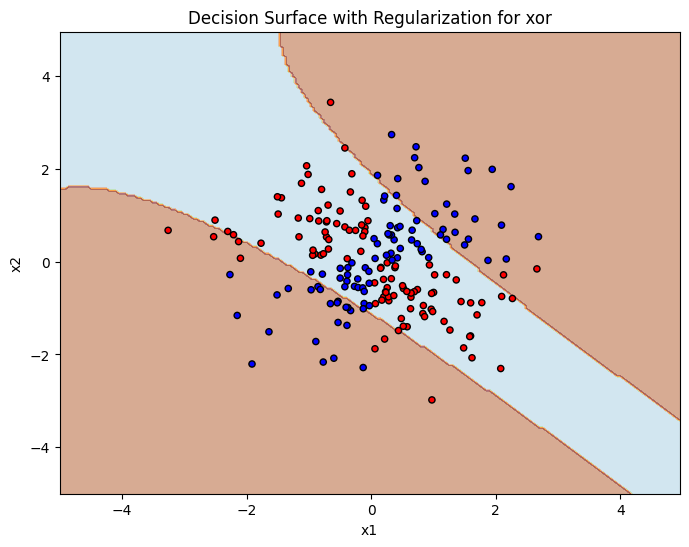

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## function for plot learning curves

def plot_learning_curves(train_loss, val_loss, title="Learning Curves"):
    """
    Plot the learning curves for training and validation loss.

    Parameters:
    - train_loss: List of training loss values over epochs.
    - val_loss: List of validation loss values over epochs.
    - title: Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(train_loss, label="Training Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_decision_surface(model=None,
                          axis_limits=(-5, 5, -5, 5),
                          ax: plt.Axes = None):

    xx, yy = np.meshgrid(np.arange(axis_limits[0], axis_limits[1], 0.05),
                         np.arange(axis_limits[2], axis_limits[3], 0.05))
    data = np.concatenate([xx.reshape([1, -1]), yy.reshape([1, -1])]).T

    # Add a bias term of 1 to each point in the grid, resulting in shape [N, 3]
    bias_column = np.ones((data.shape[0], 1))  # Create a column of ones for the bias term
    data_with_bias = np.hstack([bias_column, data])  # Combine bias, x1, and x2 columns
    if isinstance(model, nn.Module):
        with torch.no_grad():
            pl = model(torch.tensor(data_with_bias, dtype=torch.float32))
            predicted_labels = torch.argmax(pl, dim=1).numpy()  # Get class predictions
    else:
        predicted_labels = model(data_with_bias)
    predicted_labels = predicted_labels.reshape(xx.shape)
    if ax is None:
        ax = plt
    contour = ax.contourf(xx, yy, predicted_labels, cmap=plt.cm.Paired, alpha=0.5)
    ax.axis('equal')
    ax.axis('tight')
    if ax is None:
        plt.show()
    return contour

def plot_best_decision_surface(model, x_test, y_test, title="Decision Surface", axis_limits = (-5,5,-5,5)):
    """
    Plot the decision surface of the best model using test data.

    Parameters:
    - model: Trained model to generate predictions.
    - x_test: Test dataset features (2D array).
    - y_test: Test dataset labels.
    - title: Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    plot_decision_surface(model=model, axis_limits = axis_limits)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()



# FFNN Class Definition
class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, activation):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim, bias=False)
        self.fc2 = nn.Linear(hidden_dim, output_dim, bias=False)
        #use Sigmoid as activation function
        self.activation_fn = activation
    
    def forward(self, x):
        #apply activation function after doing linear combination between input layer and hidden layer.
        x = self.activation_fn(self.fc1(x))
        # since we are using Cross entropy loss as the loss function， we dont need activation function for output layer
        x = self.fc2(x)
        return x
    
def load_data(name):
        x_train, y_train, _ = read_data(name, 'train')
        x_test, y_test, _ = read_data(name, 'test')
        x_val, y_val, _ = read_data(name, 'valid')
        
        x_train, y_train = torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)
        x_val, y_val = torch.tensor(x_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long)
        x_test, y_test = torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long)
        
        # Loaders for batching
        train_loader = torch.utils.data.DataLoader(dataset=torch.utils.data.TensorDataset(x_train, y_train), batch_size=16, shuffle=True)
        val_loader = torch.utils.data.DataLoader(dataset=torch.utils.data.TensorDataset(x_val, y_val), batch_size=16, shuffle=False)
        test_loader = torch.utils.data.DataLoader(dataset=torch.utils.data.TensorDataset(x_test, y_test), batch_size=16, shuffle=False)
        
        return train_loader, val_loader, test_loader

def train_model_with_regularization(
    model, train_loader, val_loader, criterion, optimizer, epochs, lambda_norm=0.01, lambda_orth=0.01
):
    train_loss, val_loss = [], []
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for x_batch, y_batch in train_loader:
            y_batch = y_batch.squeeze().long()
            optimizer.zero_grad()
            output = model(x_batch)
            y_one_hot = F.one_hot(y_batch, num_classes=output.size(1)).float()
            loss = criterion(output, y_one_hot)
            
            # Frobenius norm regularization
            reg_norm = lambda_norm * torch.norm(model.fc1.weight, p='fro')
            
            # Orthogonality regularization
            weight = model.fc1.weight
            reg_orth = lambda_orth * torch.sum((weight @ weight.T - torch.eye(weight.size(0)).to(weight.device)) ** 2)
            
            # Combine total loss
            total_loss = loss + reg_norm + reg_orth
            total_loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        train_loss.append(epoch_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_epoch_loss = 0
        with torch.no_grad():
            for x_val, y_val in val_loader:
                y_val = y_val.squeeze().long()
                val_output = model(x_val)

                y_val_one_hot = F.one_hot(y_val, num_classes=val_output.size(1)).float()
                val_loss_batch = criterion(val_output, y_val_one_hot)
                
                # Use regularization terms without recalculating weight
                val_epoch_loss += val_loss_batch.item()
        
        # Append validation loss per epoch
        val_loss.append(val_epoch_loss / len(val_loader))

    return train_loss, val_loss


def evaluate_model(model, data_loader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for x_batch, y_batch in data_loader:
            y_batch = y_batch.squeeze().long()
            output = model(x_batch)
            predictions = torch.argmax(output, dim=1)
            correct += (predictions == y_batch).sum().item()
            total += y_batch.size(0)
    return correct / total

lambda_norm = 0.01
lambda_orth = 0.01
learning_rate = 0.1
epochs = 100
dataset_names = ["xor"]
nodes_options = [3]

for name in dataset_names:
    train_loader, val_loader, test_loader = load_data(name)
    best_accuracy = 0
    best_model = None
    best_train_loss, best_val_loss = None, None
    for node in nodes_options:
        # two weights and 1 bias
        ffnn = FFNN(3, node, 2, nn.Tanh())
        # criterion = nn.CrossEntropyLoss()
        criterion = nn.MSELoss()
        # use Stochastic Gradient Descent as my optimizer
        optimizer = optim.SGD(ffnn.parameters(), lr=learning_rate)
        # get the list of train loss, validation loss for each epoch
        train_loss, val_loss = train_model_with_regularization(ffnn, train_loader, val_loader, criterion, optimizer, epochs, lambda_norm, lambda_orth)
        # get accuracy of model
        accuracy = evaluate_model(ffnn, test_loader)
        # find best accuracy and other variables
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = ffnn
            best_train_loss, best_val_loss = train_loss, val_loss

plot_learning_curves(best_train_loss, best_val_loss, f"Learning Curve with Regularization for {name} (Best: {node} nodes)")
print(f"Final test accuracy for {name} with regularization: {best_accuracy}")

# Plot the decision surface regularization
x_test, y_test, _ = read_data(name, 'test')
y_test = y_test.squeeze()
x_test = x_test[:, 1:]
plot_best_decision_surface(best_model, x_test, y_test, title=f"Decision Surface with Regularization for {name}")